In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [3]:
cc=pd.read_csv("creditcard.csv")

In [4]:
cc.isnull().sum()

Unnamed: 0     0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [5]:
cc.columns

Index(['Unnamed: 0', 'card', 'reports', 'age', 'income', 'share',
       'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards',
       'active'],
      dtype='object')

In [9]:
df=pd.DataFrame(cc)

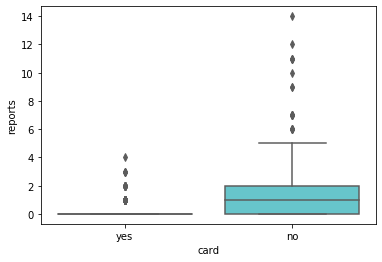

In [11]:
sb.boxplot(x="card",y="reports",data=df,palette="hls")

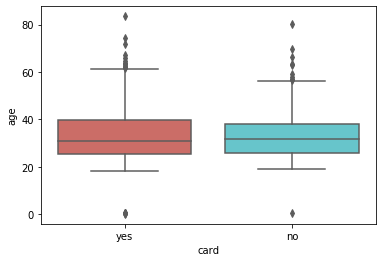

In [12]:
sb.boxplot(x="card",y="age",data=df,palette="hls")

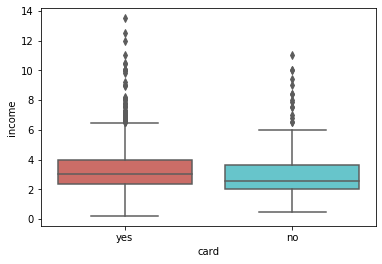

In [13]:
sb.boxplot(x="card",y="income",data=df,palette="hls")

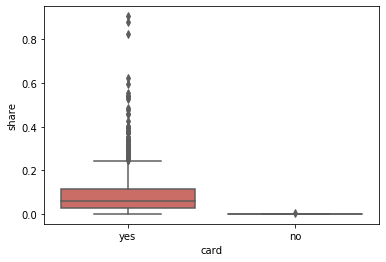

In [14]:
sb.boxplot(x="card",y="share",data=df,palette="hls")

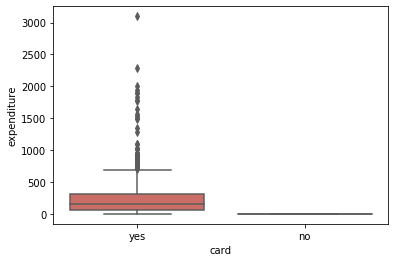

In [15]:
sb.boxplot(x="card",y="expenditure",data=df,palette="hls")

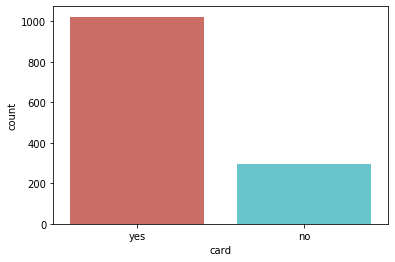

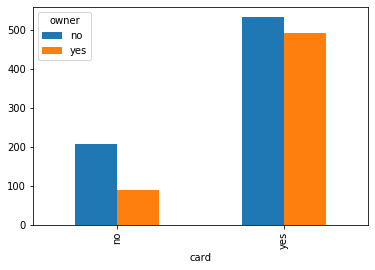

In [17]:
# Getting the barplot for the categorical columns 

sb.countplot(x="card",data=df,palette="hls")
pd.crosstab(df.card,df.owner).plot(kind="bar")



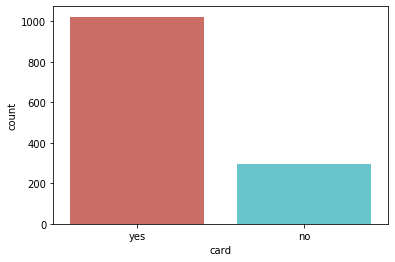

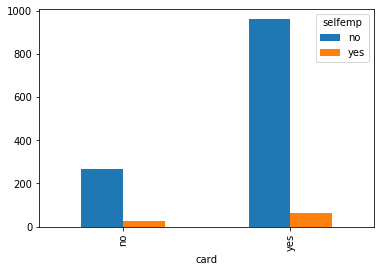

In [19]:
# Getting the barplot for the categorical columns 

sb.countplot(x="card",data=df,palette="hls")
pd.crosstab(df.card,df.selfemp).plot(kind="bar")



In [20]:
# create dummies for owner Column
dummies = pd.get_dummies(df['owner']).rename(columns=lambda x: 'owner_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)

In [21]:
# create dummies for owner Column
dummies = pd.get_dummies(df['selfemp']).rename(columns=lambda x: 'selfemp_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)

In [22]:
row_indexes=df[df['card']=="yes"].index

In [23]:
df.loc[row_indexes,'Card']=1

In [24]:
row_indexes=df[df['card']=="no"].index

In [25]:
df.loc[row_indexes,'Card']=0

In [26]:
df=df.drop("owner",1)

In [27]:
df=df.drop("selfemp",1)

In [28]:
df=df.drop("card",1)

In [32]:
df=df.drop("Unnamed: 0",1)

In [33]:
df.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active', 'owner_no', 'owner_yes', 'selfemp_no',
       'selfemp_yes', 'Card'],
      dtype='object')

In [34]:
df.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes,Card
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,0,1,1,0,1.0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,1,0,1.0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,0,1,1,0,1.0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,1,0,1.0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,0,1,1,0,1.0


In [37]:
# Model building 
from sklearn.linear_model import LogisticRegression

df.shape
X = df.iloc[:,0:13]


In [38]:
X

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,0,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,1,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,0,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,1,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,0,94,1,19,0,1,1,0
1315,5,23.91667,3.1920,0.000376,0.000000,3,12,1,5,1,0,1,0
1316,0,40.58333,4.6000,0.026513,101.298300,2,1,1,2,0,1,1,0
1317,0,32.83333,3.7000,0.008999,26.996670,0,60,1,7,1,0,0,1


In [39]:
Y = df.iloc[:,13]

In [40]:
Y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1314    1.0
1315    0.0
1316    1.0
1317    1.0
1318    1.0
Name: Card, Length: 1319, dtype: float64

In [41]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\anilkrishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
classifier.coef_ # coefficients of features 

array([[-1.53805454e+00,  7.55170167e-03, -1.60381565e-01,
        -2.15448817e-04,  1.60209336e+00, -7.06331321e-01,
        -2.32364559e-03,  2.58812485e-01,  7.55689952e-02,
        -6.24770591e-01, -3.09680454e-02, -6.00409246e-01,
        -5.53293899e-02]])

In [43]:
classifier.predict_proba (X) # Probability values 

array([[0.00000000e+00, 1.00000000e+00],
       [2.72631193e-06, 9.99997274e-01],
       [2.15954588e-09, 9.99999998e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [44]:
y_pred = classifier.predict(X)
df["y_pred"] = y_pred
#y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
#new_df = pd.concat([claimants,y_prob],axis=1)


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)


[[ 295    1]
 [  23 1000]]


In [46]:
type(y_pred)
accuracy = sum(Y==y_pred)/df.shape[0]


In [47]:
pd.crosstab(y_pred,Y)

Card,0.0,1.0
row_0,,
0.0,295,23
1.0,1,1000


In [48]:
accuracy

0.9818043972706596